In [ ]:
# Basic library for data processing and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re 
import os 
import random 

In [ ]:
# Loading the dataset

#picking the file to read from the drive 
drive_url = 'https://docs.google.com/spreadsheets/d/1eQtvp8OufSzfVvwOOXCavskXL2l2nKcJ/edit?usp=sharing&ouid=107620969816336124240&rtpof=true&sd=true' #Read the Excel Sheet, which contains 4000 House properties scraped from zolo.ca.
new_url = 'https://drive.google.com/uc?export=download&id=' + drive_url.split('/')[-2] #Save into temporary location

data = pd.read_excel(new_url)

# first 5 samples from dataset
data.head()

,Unnamed: 0,comment,label
0,0,"Mohammad harun, he is an awesome guy very info...",Postive
1,1,"amazing guy gaurav was, so patience and kind. ...",Postive
2,2,Gaurav was very knowledgeable and very helpful...,Postive
3,3,I called them regarding my flight cancellation...,Postive
4,4,VERY GOOD SERVICE BY GAURAV LOHAT SERVED AS SO...,Postive


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308384 entries, 0 to 308383
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  308384 non-null  int64 
 1   comment     308368 non-null  object
 2   label       308384 non-null  object
dtypes: int64(1), object(2)
memory usage: 7.1+ MB


In [ ]:
data['label'].value_counts()

Postive     271113
Negative     37271
Name: label, dtype: int64

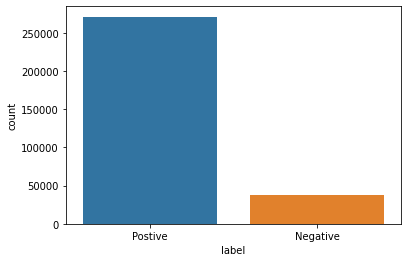

In [ ]:
sns.countplot(x = "label", data = data)

In [ ]:
pos100 = data[data['label']=='Postive'].sample(n=100)
pos100

,Unnamed: 0,comment,label
197179,197179,"Thank you very much, I'd like to thank especia...",Postive
142270,142270,great site................,Postive
75154,75154,Everything was good as always but when getting...,Postive
292776,292776,Nice people too.,Postive
108247,108247,I've been using Cheapair since 2014 to travel ...,Postive
...,...,...,...
190455,190455,Worst customer service. Representative could b...,Postive
135393,135393,Very convenient. Direction to 2H should be mad...,Postive
242553,242553,"Easy to find the flight you want, good deals, ...",Postive
98543,98543,Great services,Postive


In [ ]:
neg100 = data[data['label']=='Negative'].sample(n=100)
neg100

,Unnamed: 0,comment,label
294071,294071,"Upon booking one flight was chosen, but was gi...",Negative
216573,216573,Good experience,Negative
14911,14911,They are a joke! I do understand they are a lo...,Negative
53738,53738,With the Corona Virus and World Health Organiz...,Negative
61306,61306,"Amazing service! Easy to use, fast and efficie...",Negative
...,...,...,...
87488,87488,Really disappointed with the service. I wanted...,Negative
100548,100548,I loved the experience! Great prices,Negative
235798,235798,I have booked hundreds of airline flights with...,Negative
18515,18515,A small mistake costing a few hundred dollars ...,Negative


## Data Preprocessing
- removing null values
- removing duplicate value
- Normalizing text(case normalization)
- removing unicode character(punctuations mark, emojis,urls etc.) :: https://pypi.org/project/tweet-preprocessor/
- removing stopwords
- spell correction/typo correction
- language detection and removing the other language comments as it is few.

In [ ]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.duplicated().value_counts()

False    304322
True       4046
dtype: int64

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
# removing everything which is not alphabets
data['comment'].replace("[^a-zA-Z]"," ", regex=True, inplace=True)

### Spell correction
- NER is an important step that needs to be done before correcting a spelling.
Organisations, cardinal, people, places shouldn't be corrected.

In [ ]:
!pip install pyspellchecker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 32.6 MB/s eta 0:00:00


In [ ]:
import spacy
from spellchecker import SpellChecker

spell = SpellChecker()

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# It will not correct the spelling of nouns

from nltk.tag import pos_tag
nouns = ['NN','NNS','NNP','NNPS']

count = 0
processed_text = []
for temp in data['comment']:

  token = temp.split(' ')
  token_tag = pos_tag(token)

  corr = []

  for tkn in token_tag:
    if tkn[1] in nouns:
      corr.append(tkn[0])
    else:
      corr.append(spell.correction(tkn[0]))
  processed_text.append(corr)

  # count += 1
  # if count%100 == 0:
  #   print(count)

In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
TreebankWordDetokenizer().detokenize(['the', 'quick', 'brown'])

new_column = []
for txt in processed_text:
  temp = ' '.join(map(str,txt))
  new_column.append(temp)

In [ ]:
data['processed_text'] = new_column
data.head()

,comment,label,processed_text
0,Mohammad harun he is an awesome guy very info...,Postive,Mohammad harun he is an awesome guy very info...
1,amazing guy gaurav was so patience and kind ...,Postive,amazing guy gaurav was so patience and kind ...
2,Gaurav was very knowledgeable and very helpful...,Postive,Gaurav was very knowledgeable and very helpful...
3,I called them regarding my flight cancellation...,Postive,I called them regarding my flight cancellation...
4,VERY GOOD SERVICE BY GAURAV LOHAT SERVED AS SO...,Postive,VERY GOOD SERVICE BY GAURAV LOHAT SERVED AS SO...


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['processed_text'] = data['processed_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
data.to_csv('/content/drive/MyDrive/AIP Team 5/temp.csv',index=False)